Романовский А.Н. 19.10.2022
___

Работа с изображениями с целью аугментации.
    
1. Изображения, на которых автомобили есть или нет. 100 изображений целевого класса и 100 нецелевого. Размер 256x256px.
2. Библиотеки: OpenCV, pillow, scikit-image, tf.image. 
3. Аугментация (вращение, растяжение/сжатие, увеличение/уменьшение). Количество изображений должно увеличиться минимум в 3 раза.


In [28]:
from icrawler.builtin import GoogleImageCrawler 
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


Скачиваем изоброжения при помощи готового парсера google_crawler

In [ ]:
google_crawler = GoogleImageCrawler(storage={'root_dir': 'C:/Users/rtony/teachme/ДЗ/saveimage'})
google_crawler.crawl(keyword = 'car photo', max_num = 100)
google_crawler.crawl(keyword = 'photo', max_num = 100)

In [2]:
path = r'C:/Users/rtony/teachme/ДЗ/saveimage/'
files = os.listdir('C:/Users/rtony/teachme/ДЗ/saveimage')

Переименовываем изображения, т.к. парсер скачивает странные и повторяющиеся имена 

In [ ]:
n = 0   
 
for _ in files:
    oldname = path + files[n]
    newname = path + str(n + 1) + '.jpg'
    os.rename(oldname, newname) 
    n += 1

In [3]:
print(len(files))

200


При помощи cv2 приводим все изображения к размеру 256х256

In [4]:
for img in files:    
    img_read = cv2.imread(f"saveimage/{img}", cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img_read, (256, 256))
    cv2.imwrite(f'saveimage/{img}', resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [15]:
test_img = (f'saveimage/{files[0]}')

In [16]:
img = cv2.imread(test_img, cv2.IMREAD_UNCHANGED)
img.shape

(256, 256, 3)

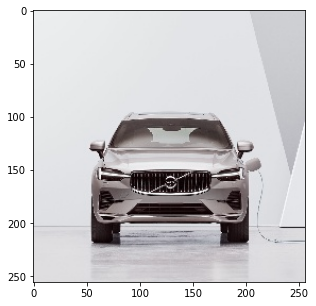

In [17]:
plt.figure(figsize=(10,5))
plt.imshow(img)

Функиця поворачивает все изображения на 10 градусов

In [18]:
def RotationMatrix2D(img):
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    scale=1.0
    (h, w) = img.shape[0:2]
    center = (w // 2, h // 2)
    Cx,Cy=center[0],center[1]
    L = np.radians(10)  
    a=scale*np.cos(L)
    b=scale*np.sin(L)
    M = np.array([[a,b,(1-a)*Cx-b*Cy],[-b,a,b*Cx+(1-a)*Cy]])
    return cv2.warpAffine(img, M, (w, h))

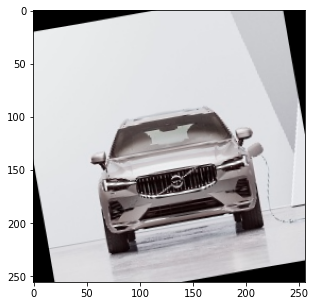

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(RotationMatrix2D(test_img))

Выполним сжатие изображений 

In [20]:
def resize_img(img):
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    resized = cv2.resize(img, (100, 256))
    return resized

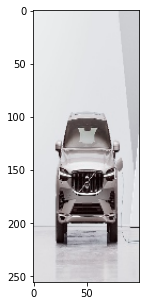

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(resize_img(test_img))

Выполним уменьшение изображения, путем вырезания облости

In [22]:
def cropp_img(img):
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    cropped_image = img[90:230, 40:215] 
    return cropped_image

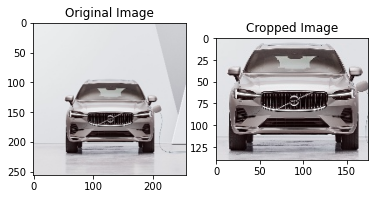

In [34]:
plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(cropp_img(test_img))
plt.title('Cropped Image')

plt.show()

Сохраним данные изображения 

In [35]:
img_counter = 1
for img in files:
    img = f'saveimage/{img}'
    croped = cropp_img(img)    
    rotation =  RotationMatrix2D(img)
    resize = resize_img(img)
    cv2.imwrite(f'saveimage/{img_counter}croped.jpg', croped)
    cv2.imwrite(f'saveimage/{img_counter}rotation.jpg', rotation)
    cv2.imwrite(f'saveimage/{img_counter}resize.jpg', resize)
    img_counter+=1


In [38]:
files = os.listdir('C:/Users/rtony/teachme/ДЗ/saveimage')
print(len(files))

800
